In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def x_dot(x,y,z,f,*dist):
    return y

def y_dot(x,y,z,f,*dist):
    return -alpha*y - np.sin(x) + f*np.cos(z)

def z_dot(x,y,z,f,*dist):
    return omega

def f_dot(x,y,z,f,*dist):
    return 0

In [3]:
def x_dist_dot(x,y,z,f,x_dist,y_dist,z_dist):
    return y_dist

def y_dist_dot(x,y,z,f,x_dist,y_dist,z_dist):
    return -alpha*y_dist - np.cos(x)*x_dist - f*np.sin(z)*z_dist

def z_dist_dot(x,y,z,f,x_dist,y_dist,z_dist):
    return 0

In [4]:
def runge_kutta(F,X_0,T,tau):
    X = np.zeros((len(T),len(X_0)))
    X[0] = X_0
    for i in range(len(T)-1):
        k_1 = np.array([f(*X[i]) for f in F])
        k_2 = np.array([f(*(X[i]+tau/2*k_1)) for f in F])
        k_3 = np.array([f(*(X[i]+tau/2*k_2)) for f in F])
        k_4 = np.array([f(*(X[i]+tau*k_3)) for f in F])
        X[i+1] = X[i] + tau/6*(k_1+2*k_2+2*k_3+k_4)
    return X

In [5]:
from ipywidgets import IntProgress
from IPython.display import display

omega = 2/3; alpha = 0.25
f_start = 0.95; f_end = 1.5; f_step = 1e-3
F = np.linspace(f_start,f_end,int((f_end-f_start)/f_step)+1)

x_0 = 3; y_0 = 0; z_0 = 0
den = 10
t_start = 0; t_end = 5000; tau = 2*np.pi/omega/den
T = np.arange(t_start,t_end,tau)

Sigma = []

progress = IntProgress(min=0,max=len(F))
display(progress)

for f in F:
    Solve = runge_kutta(np.array([x_dot,y_dot,z_dot,f_dot]),np.array([x_0,y_0,z_0,f]),T,tau)
    sigma = []
    for sol in Solve[::int(den)][-500:][:,:2]:
        sigma.append(sol)
    progress.value += 1
    Sigma.append(sigma)

IntProgress(value=0, max=551)

In [6]:
print(np.array(Sigma).shape)

(551, 500, 2)


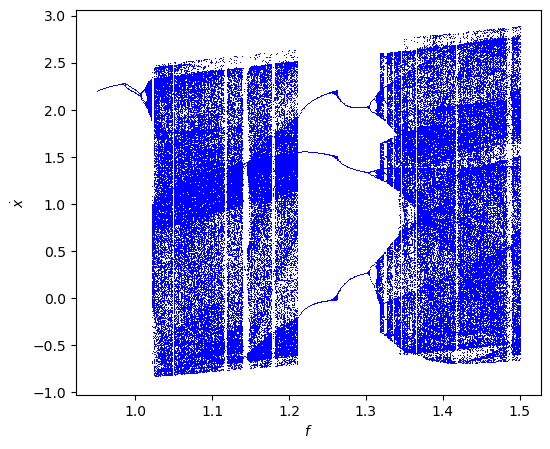

In [25]:
fig = plt.figure(figsize=(6,5))
ax = plt.axes()
ax.set_xlabel(r"$f$"); ax.set_ylabel(r"$\dot x$")

for f,sigma in zip(F,np.array(Sigma)):
    y = sigma[:,1]
    ax.plot(f*np.ones_like(y),y,color='blue',marker=',',linestyle=' ')

#### показатели Ляпунова и размерности аттракторов по формуле Каплана-Йорка

In [8]:
F_research = [1.1, 1.35, 1.5]

Lambdas = []

for f in F_research:
    vec_1 = np.array([3,0,0])
    vec_dist_1 = np.array([1,0,0])
    vec_dist_2 = np.array([0,1,0])
    vec_dist_3 = np.array([0,0,1])

    M = 1000
    T_end = 1; tau_0 = 1e-2
    T,tau = np.linspace(0,T_end,int(T_end/tau_0)+1,retstep=True)

    S_1,S_2,S_3 = 0,0,0
    S_1_vals,S_2_vals,S_3_vals = np.zeros(M+1),np.zeros(M+1),np.zeros(M+1)

    progress = IntProgress(min=0,max=M)
    display(progress)

    for i in range(M):
        Solve_dist_1 = runge_kutta(np.array([x_dot,y_dot,z_dot,f_dot,x_dist_dot,y_dist_dot,z_dist_dot]),np.concatenate((vec_1,[f],vec_dist_1)),T,tau)
        vec_dist_1 = Solve_dist_1[-1,4:]
        r_dist_1 = np.linalg.norm(vec_dist_1)
        S_1 += np.log(r_dist_1)
        S_1_vals[i+1] = S_1
        vec_dist_1 = vec_dist_1/r_dist_1

        Solve_dist_2 = runge_kutta(np.array([x_dot,y_dot,z_dot,f_dot,x_dist_dot,y_dist_dot,z_dist_dot]),np.concatenate((vec_1,[f],vec_dist_2)),T,tau)
        vec_dist_2 = Solve_dist_2[-1,4:]
        vec_dist_2 = vec_dist_2 - np.dot(vec_dist_2,vec_dist_1)*vec_dist_1
        r_dist_2 = np.linalg.norm(vec_dist_2)
        S_2 += np.log(r_dist_2)
        S_2_vals[i+1] = S_2
        vec_dist_2 = vec_dist_2/r_dist_2

        Solve_dist_3 = runge_kutta(np.array([x_dot,y_dot,z_dot,f_dot,x_dist_dot,y_dist_dot,z_dist_dot]),np.concatenate((vec_1,[f],vec_dist_3)),T,tau)
        vec_dist_3 = Solve_dist_3[-1,4:]
        vec_dist_3 = vec_dist_3 - np.dot(vec_dist_3,vec_dist_1)*vec_dist_1 - np.dot(vec_dist_3,vec_dist_2)*vec_dist_2
        r_dist_3 = np.linalg.norm(vec_dist_3)
        S_3 += np.log(r_dist_3)
        S_3_vals[i+1] = S_3
        vec_dist_3 = vec_dist_3/r_dist_3

        vec_1 = Solve_dist_1[-1,:3]

        progress.value = i

    Lambda_1 = S_1/(M*T_end); Lambda_2 = S_2/(M*T_end); Lambda_3 = S_3/(M*T_end)
    print(f"f = {f}: lambda_1 = {Lambda_1}, lambda_2 = {Lambda_2}, lambda_3 = {Lambda_3}")
    Lambdas.append([Lambda_1,Lambda_2,Lambda_3])

IntProgress(value=0, max=1000)

f = 1.1: lambda_1 = 0.1622998072017588, lambda_2 = -0.4122998071477108, lambda_3 = 0.0


IntProgress(value=0, max=1000)

f = 1.35: lambda_1 = 0.10182424488007796, lambda_2 = -0.35182424482851943, lambda_3 = 0.0


IntProgress(value=0, max=1000)

f = 1.5: lambda_1 = 0.17292658993515295, lambda_2 = -0.42292658988386544, lambda_3 = 0.0


In [9]:
Lambdas_sorted = np.sort(np.array(Lambdas))[:,::-1]
print(Lambdas_sorted)

[[ 0.16229981  0.         -0.41229981]
 [ 0.10182424  0.         -0.35182424]
 [ 0.17292659  0.         -0.42292659]]


In [10]:
d = 1 + (Lambdas_sorted[:,0]+Lambdas_sorted[:,1])/np.abs(Lambdas_sorted[:,2])
print(d)

[1.39364512 1.28941793 1.40888087]


#### размерности аттракторов покрытием кубами сечения Пуанкаре

In [11]:
def draw_square(x_c,y_c,e,color,lw):
    ax.plot([x_c-0.5*e,x_c+0.5*e],[y_c+0.5*e]*2,color=color,linewidth=lw)
    ax.plot([x_c+0.5*e]*2,[y_c+0.5*e,y_c-0.5*e],color=color,linewidth=lw)
    ax.plot([x_c+0.5*e,x_c-0.5*e],[y_c-0.5*e]*2,color=color,linewidth=lw)
    ax.plot([x_c-0.5*e]*2,[y_c-0.5*e,y_c+0.5*e],color=color,linewidth=lw)

In [12]:
x_0 = 3; y_0 = 0; z_0 = 0
den = 10
t_start = 0; t_end = 1e5; tau = 2*np.pi/omega/den
T = np.arange(t_start,t_end,tau)

Sigma_draw = []

progress = IntProgress(min=0,max=len(F_research))
display(progress)

for f in F_research:
    Solve = runge_kutta(np.array([x_dot,y_dot,z_dot,f_dot]),np.array([x_0,y_0,z_0,f]),T,tau)
    sigma = []
    for sol in Solve[::int(den)][:,:2]:
        sigma.append(sol)
    progress.value += 1
    Sigma_draw.append(sigma)

IntProgress(value=0, max=3)

In [13]:
Sigma_draw_arr = np.array(Sigma_draw)
Sigma_draw_arr[:,:,0] = np.mod(Sigma_draw_arr[:,:,0],2*np.pi)

In [14]:
def find_squares(Sigma,X_c,Y_c,e,show_progress=False):
    Coord_c = []
    
    if show_progress:
        progress = IntProgress(min=0,max=len(X_c)*len(Y_c))
        display(progress)
    
    for x_c in X_c:
        for y_c in Y_c:
            if show_progress: progress.value += 1
            for sigma in Sigma:
                if np.abs(x_c-sigma[0]) < 0.5*e and np.abs(y_c-sigma[1]) < 0.5*e:
                    Coord_c.append([x_c,y_c])
                    break
    return np.array(Coord_c)

In [15]:
e = 0.2
X_c_draw = np.arange(0,2*np.pi,e) + 0.5*e
Y_c_draw = np.arange(-1,3,e) + 0.5*e

Coord_c = find_squares(Sigma_draw_arr[0],X_c_draw,Y_c_draw,e,show_progress=True)

IntProgress(value=0, max=640)

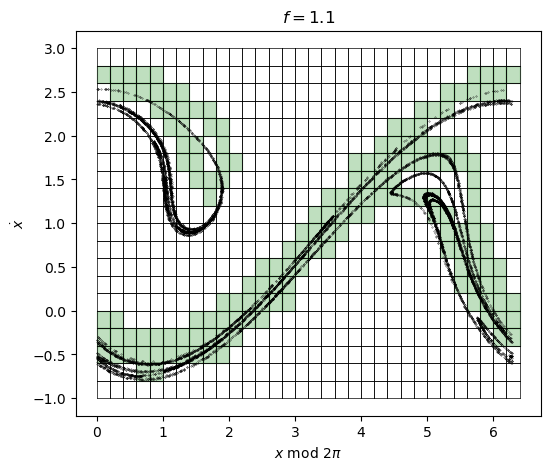

In [26]:
fig = plt.figure(figsize=(6,5))
ax = plt.axes()
ax.set_xlabel(r"$x$ mod $2\pi$"); ax.set_ylabel(r"$\dot x$")
ax.set_title(f"$f = {F_research[0]}$")

# x_ticks_minor = np.arange(0,2*np.pi+e,e)
# x_ticks_major = x_ticks_minor[::5]
# y_ticks_minor = np.arange(-1,3+e,e)
# y_ticks_major = y_ticks_minor[::5]
# ax.set_xticks(x_ticks_major); ax.set_xticks(x_ticks_minor,minor=True)
# ax.set_yticks(y_ticks_major); ax.set_yticks(y_ticks_minor,minor=True)
# ax.grid(which="major",alpha=1,color='black'); ax.grid(which="minor",alpha=1,color='black')

for x_c in X_c_draw:
    for y_c in Y_c_draw:
        draw_square(x_c,y_c,e,color='black',lw=0.5)
        
for coord_c in Coord_c:
    ax.fill_between([coord_c[0]-0.5*e,coord_c[0]+0.5*e],[coord_c[1]-0.5*e]*2,[coord_c[1]+0.5*e]*2,color='green',alpha=0.25)

for sigma in Sigma_draw_arr[0]:
    x = sigma[0]; y = sigma[1]
    ax.plot(x,y,color='black',marker='.',markersize=0.5,linestyle=' ')

In [17]:
E = np.linspace(0.1,1,10)[::-1]

N = np.zeros_like(E)

progress = IntProgress(min=0,max=len(E))
display(progress)

for i,e in enumerate(E):
    X_c_draw = np.arange(0,2*np.pi,e) + 0.5*e
    Y_c_draw = np.arange(-1,3,e) + 0.5*e

    Coord_c = find_squares(Sigma_draw_arr[0],X_c_draw,Y_c_draw,e)
    N[i] = len(Coord_c)
    progress.value += 1

IntProgress(value=0, max=10)

<IPython.core.display.Javascript object>


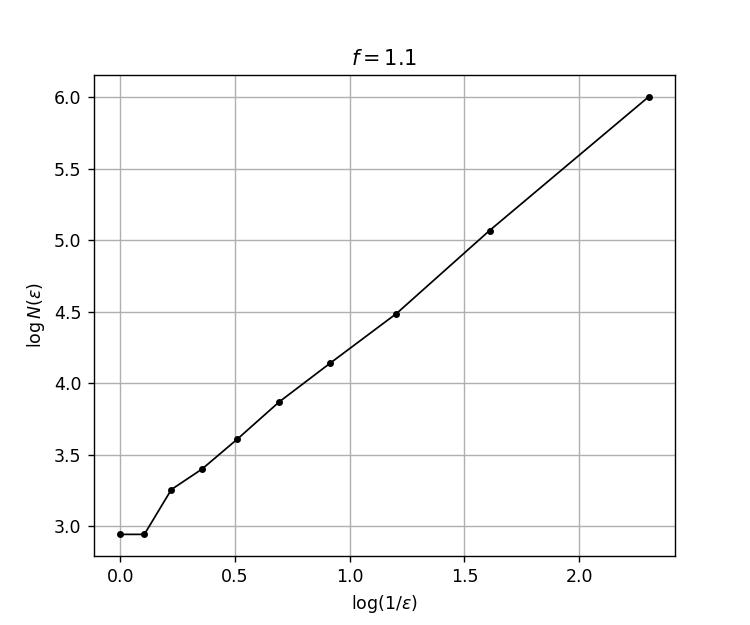

In [18]:
fig = plt.figure(figsize=(6,5))
ax = plt.axes()
ax.set_xlabel(r"$\log(1/\epsilon)$"); ax.set_ylabel(r"$\log N(\epsilon)$")
ax.grid()
ax.set_title(f"$f = {F_research[0]}$")

ax.plot(np.log(1/E),np.log(N),marker='o',markersize=3,color='black',linewidth=1)

In [19]:
print('f =',F_research[-1])
print('d_k =',d[0])
print('d_c =',(np.log(N[-1])-np.log(N[0]))/(np.log(1/E[-1])-np.log(1/E[0])))

f = 1.5
d_k = 1.3936451203422784
d_c = 1.3287014222618394


In [20]:
e = 0.2
X_c_draw = np.arange(0,2*np.pi,e) + 0.5*e
Y_c_draw = np.arange(-1,3,e) + 0.5*e

Coord_c = find_squares(Sigma_draw_arr[1],X_c_draw,Y_c_draw,e,show_progress=True)

IntProgress(value=0, max=640)

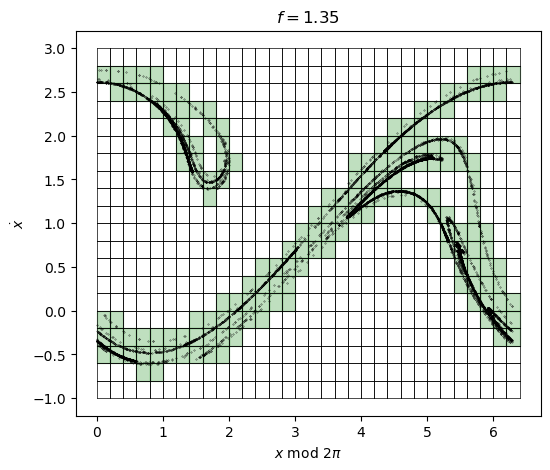

In [27]:
fig = plt.figure(figsize=(6,5))
ax = plt.axes()
ax.set_xlabel(r"$x$ mod $2\pi$"); ax.set_ylabel(r"$\dot x$")
ax.set_title(f"$f = {F_research[1]}$")

for x_c in X_c_draw:
    for y_c in Y_c_draw:
        draw_square(x_c,y_c,e,color='black',lw=0.5)
        
for coord_c in Coord_c:
    ax.fill_between([coord_c[0]-0.5*e,coord_c[0]+0.5*e],[coord_c[1]-0.5*e]*2,[coord_c[1]+0.5*e]*2,color='green',alpha=0.25)

for sigma in Sigma_draw_arr[1]:
    x = sigma[0]; y = sigma[1]
    ax.plot(x,y,color='black',marker='.',markersize=0.5,linestyle=' ')

In [22]:
E = np.linspace(0.1,1,10)[::-1]

N = np.zeros_like(E)

progress = IntProgress(min=0,max=len(E))
display(progress)

for i,e in enumerate(E):
    X_c_draw = np.arange(0,2*np.pi,e) + 0.5*e
    Y_c_draw = np.arange(-1,3,e) + 0.5*e

    Coord_c = find_squares(Sigma_draw_arr[1],X_c_draw,Y_c_draw,e)
    N[i] = len(Coord_c)
    progress.value += 1

IntProgress(value=0, max=10)

<IPython.core.display.Javascript object>


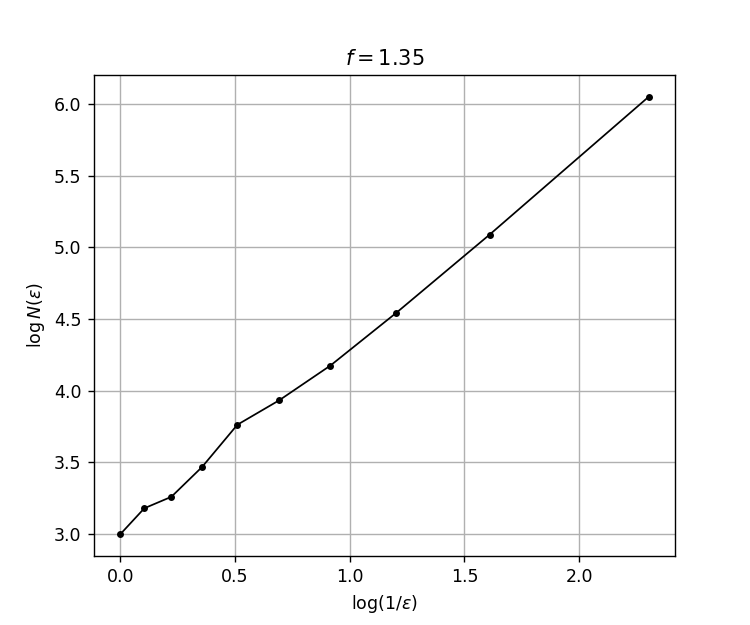

In [23]:
fig = plt.figure(figsize=(6,5))
ax = plt.axes()
ax.set_xlabel(r"$\log(1/\epsilon)$"); ax.set_ylabel(r"$\log N(\epsilon)$")
ax.grid()
ax.set_title(f"$f = {F_research[1]}$")

ax.plot(np.log(1/E),np.log(N),marker='o',markersize=3,color='black',linewidth=1)

In [24]:
print('f =',F_research[-1])
print('d_k =',d[1])
print('d_c =',(np.log(N[-1])-np.log(N[0]))/(np.log(1/E[-1])-np.log(1/E[0])))

f = 1.5
d_k = 1.290503160644711
d_c = 1.3263358609287514


In [25]:
e = 0.2
X_c_draw = np.arange(0,2*np.pi,e) + 0.5*e
Y_c_draw = np.arange(-1,3,e) + 0.5*e

Coord_c = find_squares(Sigma_draw_arr[-1],X_c_draw,Y_c_draw,e,show_progress=True)

IntProgress(value=0, max=640)

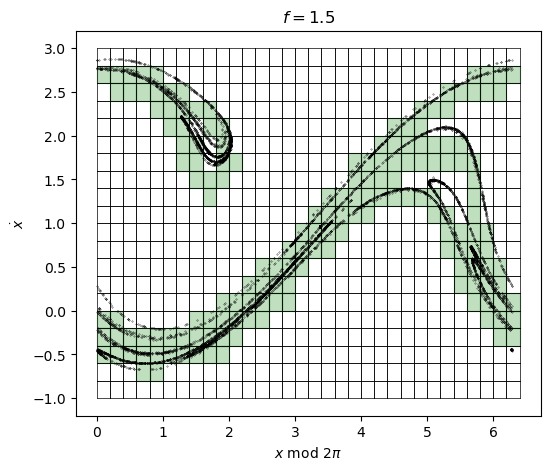

In [28]:
fig = plt.figure(figsize=(6,5))
ax = plt.axes()
ax.set_xlabel(r"$x$ mod $2\pi$"); ax.set_ylabel(r"$\dot x$")
ax.set_title(f"$f = {F_research[-1]}$")

for x_c in X_c_draw:
    for y_c in Y_c_draw:
        draw_square(x_c,y_c,e,color='black',lw=0.5)
        
for coord_c in Coord_c:
    ax.fill_between([coord_c[0]-0.5*e,coord_c[0]+0.5*e],[coord_c[1]-0.5*e]*2,[coord_c[1]+0.5*e]*2,color='green',alpha=0.25)

for sigma in Sigma_draw_arr[-1]:
    x = sigma[0]; y = sigma[1]
    ax.plot(x,y,color='black',marker='.',markersize=0.5,linestyle=' ')

In [27]:
E = np.linspace(0.1,1,10)[::-1]

N = np.zeros_like(E)

progress = IntProgress(min=0,max=len(E))
display(progress)

for i,e in enumerate(E):
    X_c_draw = np.arange(0,2*np.pi,e) + 0.5*e
    Y_c_draw = np.arange(-1,3,e) + 0.5*e

    Coord_c = find_squares(Sigma_draw_arr[-1],X_c_draw,Y_c_draw,e)
    N[i] = len(Coord_c)
    progress.value += 1

IntProgress(value=0, max=10)

<IPython.core.display.Javascript object>


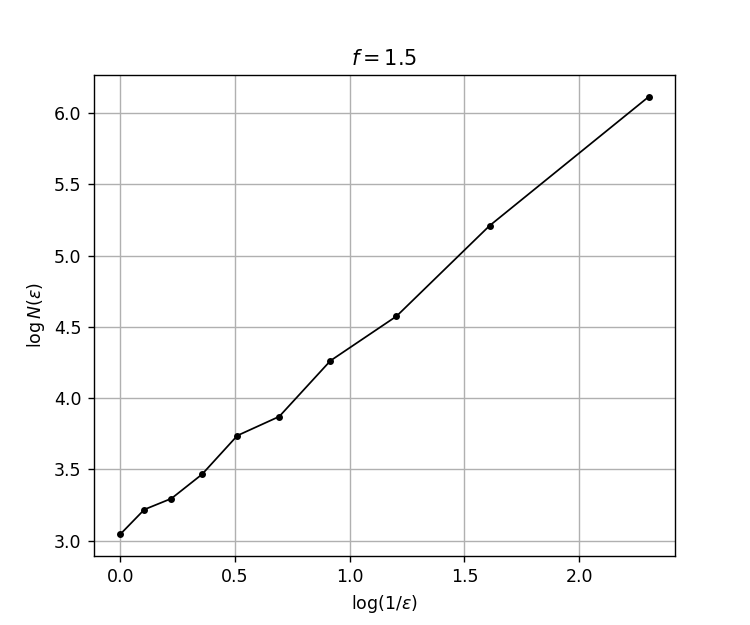

In [28]:
fig = plt.figure(figsize=(6,5))
ax = plt.axes()
ax.set_xlabel(r"$\log(1/\epsilon)$"); ax.set_ylabel(r"$\log N(\epsilon)$")
ax.grid()
ax.set_title(f"$f = {F_research[-1]}$")

ax.plot(np.log(1/E),np.log(N),marker='o',markersize=3,color='black',linewidth=1)

In [29]:
print('f =',F_research[-1])
print('d_k =',d[-1])
print('d_c =',(np.log(N[-1])-np.log(N[0]))/(np.log(1/E[-1])-np.log(1/E[0])))

f = 1.5
d_k = 1.403254942363363
d_c = 1.332919140077463
